## Facies classification using Machine Learning Random Forrest


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as color
import seaborn as sns
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data
data = pd.read_csv('Facies_vectors.csv')
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [3]:
#Label of Facies
labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS'] 
data['Facies_Label']=np.select([data['Facies'] == 1,
                                data['Facies'] == 2,
                                data['Facies'] == 3,
                                data['Facies'] == 4,
                                data['Facies'] == 5,
                                data['Facies'] == 6,
                                data['Facies'] == 7,
                                data['Facies'] == 8,
                                data['Facies'] == 9,]
                                ,labels,default='')

In [4]:
#Unique items in a column that is categorical
data['Well Name'] = data['Well Name'].astype('category')
data['Formation'] = data['Formation'].astype('category')
data['Facies_Label'] = data['Facies_Label'].astype('category')


In [5]:
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Label
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,FSiS
...,...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,MS
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,MS
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,MS
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,MS


In [6]:
#Set Index Depth
data.set_index('Depth',inplace=True)

In [7]:
#Group by Well Name
data.groupby("Well Name").count()

,Facies,Formation,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_Label
Well Name,,,,,,,,,,
ALEXANDER D,466,466,466,466,466,466,0,466,466,466
CHURCHMAN BIBLE,404,404,404,404,404,404,404,404,404,404
CROSS H CATTLE,501,501,501,501,501,501,501,501,501,501
KIMZEY A,439,439,439,439,439,439,0,439,439,439
LUKE G U,461,461,461,461,461,461,461,461,461,461
NEWBY,463,463,463,463,463,463,463,463,463,463
NOLAN,415,415,415,415,415,415,415,415,415,415
Recruit F9,80,80,80,80,80,80,68,80,80,80
SHANKLE,449,449,449,449,449,449,449,449,449,449


In [8]:
#Delete Rows with Missing Data
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3232 entries, 2793.0 to 3122.5
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Facies        3232 non-null   int64   
 1   Formation     3232 non-null   category
 2   Well Name     3232 non-null   category
 3   GR            3232 non-null   float64 
 4   ILD_log10     3232 non-null   float64 
 5   DeltaPHI      3232 non-null   float64 
 6   PHIND         3232 non-null   float64 
 7   PE            3232 non-null   float64 
 8   NM_M          3232 non-null   int64   
 9   RELPOS        3232 non-null   float64 
 10  Facies_Label  3232 non-null   category
dtypes: category(3), float64(6), int64(2)
memory usage: 238.1 KB


In [9]:
#Using well "SHANKLE" for accuracy evaluation
test_well = data[data['Well Name'] == 'SHANKLE'] #New data to test
data = data[data['Well Name'] != 'SHANKLE'] 

In [10]:
X = data.drop(['Facies','Formation','Well Name','Facies_Label'], axis = 1) #Features: Feature vector
y = data['Facies'] #Target: Facies

In [11]:
X


,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Depth,,,,,,,
2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...
3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669


## Data Split (Test/Train)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
print('Dimensions of X_train:',X_train.shape)
print('Dimensions of X_test:',X_test.shape)

Dimensions of X_train: (1948, 7)
Dimensions of X_test: (835, 7)


In [13]:
X_train

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Depth,,,,,,,
2931.5,46.813,0.857000,-0.436,4.880,4.273,2,0.902
3004.0,49.860,0.910000,7.600,7.585,4.800,2,0.480
2714.0,15.340,0.792000,0.100,9.750,5.300,2,0.789
3121.5,49.719,0.964000,2.925,8.013,3.190,2,0.669
2857.5,90.313,0.581000,5.634,13.458,3.395,1,0.818
...,...,...,...,...,...,...,...
2809.0,23.688,0.777572,-2.200,9.400,4.449,2,0.971
2927.0,53.125,0.826000,1.122,4.835,4.008,2,1.000
2927.5,73.970,0.498000,5.900,16.850,3.500,1,0.222


## Data Preprocessing
### Feature Transform: Robust Scaler

In [14]:
# Robust Scaler
rscaler = RobustScaler() #instantiate
rscaler.fit(X_train) 


RobustScaler()

In [15]:
X_train_scaled = rscaler.transform(X_train) # transform the train dataset to standardized data

# Original training dataset
print("Original median : %s " % rscaler.center_)
print("Original IQR : %s " % rscaler.scale_)

#Scaled training dataset
print("Scaled median : %s " % np.median(X_train_scaled,axis=0))
print("Scaled IQR : %s " % (np.percentile(X_train_scaled, 75,axis=0)-np.percentile(X_train_scaled, 25,axis=0)))

Original median : [65.1225  0.631   3.4995 11.85    3.608   2.      0.5435] 
Original IQR : [35.7625   0.314    5.19425  7.97225  1.2      1.       0.505  ] 
Scaled median : [ 0.00000000e+00  0.00000000e+00 -4.27514469e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.09938100e-16] 
Scaled IQR : [1. 1. 1. 1. 1. 1. 1.] 


In [16]:
#Scale the test data using the parameters learnt from the training dataset
X_test_scaled  = rscaler.transform(X_test)

print("Median of scaled test data: %s" % np.median(X_test_scaled,axis=0))
print("IQR of scaled test data: %s " % (np.percentile(X_test_scaled, 75,axis=0)-np.percentile(X_test_scaled, 25,axis=0)))

Median of scaled test data: [ 0.04727019 -0.03327247  0.03860038  0.02333093 -0.00666667  0.
 -0.08613861]
IQR of scaled test data: [0.93463824 1.00955414 1.00110699 1.00034495 1.         1.
 0.93069307] 


In [17]:
X_train=pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_test.columns)
X_test=pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)

In [18]:
X_train

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Depth,,,,,,,
2931.5,-0.511975,0.719745,-0.757665,-0.874283,0.554167,0.0,0.709901
3004.0,-0.426774,0.888535,0.789431,-0.534981,0.993333,0.0,-0.125743
2714.0,-1.392031,0.512739,-0.654474,-0.263414,1.410000,0.0,0.486139
3121.5,-0.430717,1.060510,-0.110603,-0.481294,-0.348333,0.0,0.248515
2857.5,0.704383,-0.159236,0.410935,0.201700,-0.177500,-1.0,0.543564
...,...,...,...,...,...,...,...
2809.0,-1.158602,0.466789,-1.097271,-0.307316,0.700833,0.0,0.846535
2927.0,-0.335477,0.621019,-0.457718,-0.879927,0.333333,0.0,0.903960
2927.5,0.247396,-0.423567,0.462146,0.627176,-0.090000,-1.0,-0.636634


## Random Forrest

In [19]:
#Number of trees
score=[]
t=[]
n_trees=[]
for i in range(10,300,10):
    n_trees.append(i)
    start_time = time.time()
    cforest = RandomForestClassifier(criterion='entropy',n_estimators=i,max_depth=10,random_state=1, n_jobs=2) #Creating Instance
    cforest.fit(X_train, y_train) #Learning the decision boundaries
    y_pred = cforest.predict(X_test)
    score.append(f1_score(y_test, y_pred,average="weighted"))
    t.append(time.time() - start_time)

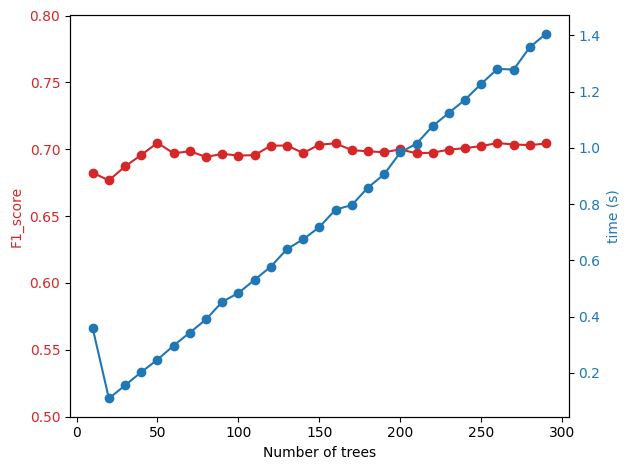

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of trees')
ax1.set_ylabel('F1_score', color=color)
ax1.set_ylim([0.5,0.8])
ax1.plot(n_trees, score, '-o',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  # we already handled the x-label with ax1
ax2.plot(n_trees, t, '-o',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [21]:
#max_depth
score=[]
max_d=[]
score_train=[]
for i in range(1,30):
    max_d.append(i)
    cforest = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=i,random_state=1, n_jobs=2) #Creating Instance
    cforest.fit(X_train, y_train) #Learning the decision boundaries
    train_pred = cforest.predict(X_train)
    score_train.append(f1_score(y_train, train_pred,average="weighted"))
    y_pred = cforest.predict(X_test)
    score.append(f1_score(y_test, y_pred,average="weighted"))

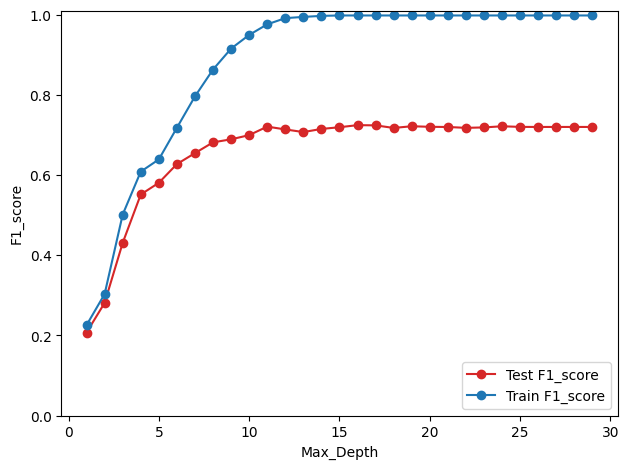

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Max_Depth')
ax1.set_ylabel('F1_score')
ax1.set_ylim([0,1.01])
ax1.plot(max_d, score, '-o',color=color,label='Test F1_score')

color = 'tab:blue'
ax1.plot(max_d, score_train, '-o',color=color,label='Train F1_score')

ax1.legend(loc="lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [23]:
#min_samples_split
score=[]
score_train=[]
min_samples=[]
for i in range(1,10,2):
    min_samples.append(i/10)
    cforest = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=10,min_samples_split=i/10,random_state=1, n_jobs=2) #Creating Instance
    cforest.fit(X_train, y_train) #Learning the decision boundaries
    train_pred = cforest.predict(X_train)
    score_train.append(f1_score(y_train, train_pred,average="weighted"))
    y_pred = cforest.predict(X_test)
    score.append(f1_score(y_test, y_pred,average="weighted"))

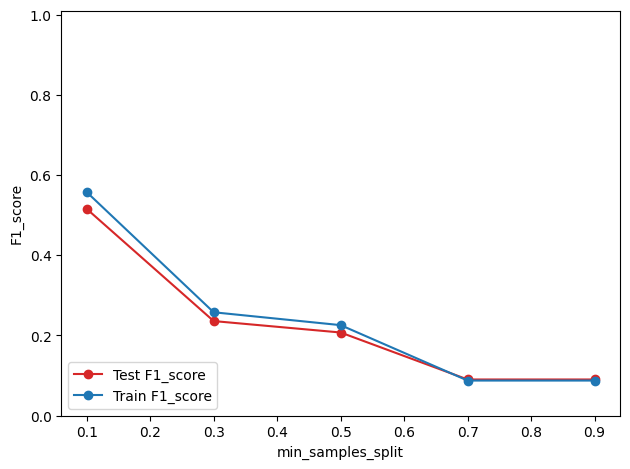

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('min_samples_split')
ax1.set_ylabel('F1_score')
ax1.set_ylim([0,1.01])
ax1.plot(min_samples, score, '-o',color=color,label='Test F1_score')

color = 'tab:blue'
ax1.plot(min_samples, score_train, '-o',color=color,label='Train F1_score')

ax1.legend(loc="lower left")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Applying Model

In [25]:
cforest = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=7,random_state=1, n_jobs=2) #Creating Instance
cforest.fit(X_train, y_train) #Learning the decision boundaries
y_pred = cforest.predict(X_test)

In [26]:
#Compare against true labels (Accuracy)
print('Accuracy (generalization)',cforest.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',cforest.score(X_train,y_train)) #Accuracy (memorization)

Accuracy (generalization) 0.6646706586826348
Accuracy (memorization) 0.8008213552361396


In [27]:
#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,cforest.predict(X_test),average="weighted")) #F1_score (generalization)  
print('F1_score (memorization)',f1_score(y_train,cforest.predict(X_train),average="weighted")) #F1_score (memorization)

F1_score (generalization) 0.6549425883698275
F1_score (memorization) 0.7964685565190546
